In [1]:
import numpy as np
import pdb
import matplotlib.pylab as plt
import re
from astropy.io import fits
import subprocess
import os
import sys

The next few cells update comm.par to better rotation values, per Steve Kent's PM wiki guide<br>
Do not repeat this unless comm.par needs to be updated again.

In [2]:
dirlist = os.listdir('test')

In [3]:
len(dirlist)

645

In [4]:
os.environ['DESI_DIR']='/project/projectdirs/desi/users/skent/plate/desi'

In [5]:
pwd()

'/global/u2/c/crockosi/platemaker'

Don't run the cell below unless you want to update the comm.par files. Switch cell type from raw to code to run<br>
Must be done for every fresh copy of the PM sequences before any reprocessing.<br>
See wiki note about using a different comm.par file before and after the CI corrector move.

Now run gfaproc

First set up environment variables and path<br>
Don't use sys.path.insert, that does not get inherited by the subprocess.

In [18]:
os.environ['DATADIR']='/project/projectdirs/desi/spectro/data'
# set PMDIR for the subdirectory that has the version of the PM data you are analyzing!
os.environ['PMDIR']='test_gfaproc_astrom_20190815'
os.environ['DESI_DIR']='/project/projectdirs/desi/users/skent/plate/desi'
os.environ['KENTOOLS_DIR']='/project/projectdirs/desi/users/skent/plate/kentools'
os.environ['DES_DIR']='/project/projectdirs/desi/users/skent/plate/des'
os.environ['DERVISH_STARTUP']='/global/project/projectdirs/desi/users/skent/plate/dervish/etc/dervishStartup.tcl'
os.environ['DERVISH_DIR']='/global/project/projectdirs/desi/users/skent/plate/dervish'
os.environ['ASTROTOOLS_STARTUP']='/project/projectdirs/desi/users/skent/products/astrotools-123513/etc/astrotoolsStartup.tcl'
os.environ['ASTROTOOLS_DIR']='/project/projectdirs/desi/users/skent/products/astrotools-123513'
os.environ['IMG_STARTUP']='/project/projectdirs/desi/users/skent/plate/desi/etc/init.tcl'

In [7]:
os.environ['PATH'] = os.environ['DATADIR']+':'+os.environ['PATH']
os.environ['PATH'] = os.environ['PMDIR']+':'+os.environ['PATH']
os.environ['PATH'] = os.environ['DESI_DIR']+':'+os.environ['PATH']
os.environ['PATH'] = os.environ['KENTOOLS_DIR']+':'+os.environ['PATH']
os.environ['PATH'] = os.environ['DES_DIR']+':'+os.environ['PATH']
os.environ['PATH'] = '/project/projectdirs/desi/users/skent/plate/desi/bin'+':'+os.environ['PATH']
os.environ['PATH'] = '/project/projectdirs/desi/users/skent/plate/des/bin'+':'+os.environ['PATH']
os.environ['PATH'] = '/project/projectdirs/desi/users/skent/plate/kentools/bin'+':'+os.environ['PATH']
os.environ['PATH'] = '/project/projectdirs/desi/users/skent/products/fpack-141/bin'+':'+os.environ['PATH']
os.environ['PATH'] = '/project/projectdirs/desi/users/skent/products/ds9/bin'+':'+os.environ['PATH']
os.environ['PATH'] = '/project/projectdirs/desi/users/skent/products/fftw-123513/bin'+':'+os.environ['PATH']
os.environ['PATH'] = '/project/projectdirs/desi/users/skent/products/xpa-2.1.13/bin'+':'+os.environ['PATH']
os.environ['PATH'] = '/project/projectdirs/desi/users/skent/products/tcl-8.4.11/bin'+':'+os.environ['PATH']
os.environ['PATH'] = '/global/project/projectdirs/desi/users/skent/plate/sdsstools/bin'+':'+os.environ['PATH']
os.environ['PATH'] = '/project/projectdirs/desi/users/skent/products/pgplot-123513/bin'+':'+os.environ['PATH']

In [8]:
os.getcwd()

'/global/u2/c/crockosi/platemaker'

In [9]:
os.environ['PMDIR']

'test'

In [10]:
#rerun gfaproc on a all the PM sequences specified in seqlist
def rerungfaproc(seqlist=None):    
    if seqlist is None:
        seqlist = os.listdir(os.environ['PMDIR'])
    os.chdir(os.environ['PMDIR'])
    nseq = len(seqlist)
    for i in range(nseq):
        iseq = seqlist[i]
        if re.search('^[0-9]',iseq) == None:
            continue
        os.chdir(iseq)
        cmdstr1 = 'confignext ' + iseq
        oneout = subprocess.run(cmdstr1,shell=True,stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
        if oneout.returncode > 0:
            print('ERROR comfignext '+iseq + ' '+cmdstr1)
            #print(oneout.stdout.decode('utf-8'))
            os.chdir('..')
            continue
        cmdstr2 = 'gfaproc ' + iseq
        twoout = subprocess.run(cmdstr2,shell=True,stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
        if twoout.returncode > 0:
            print('ERROR gfaproc '+iseq)
            #print(twoout.stdout.decode('utf-8'))
        os.chdir('..')
        
        
    

In [11]:
os.getcwd()

'/global/u2/c/crockosi/platemaker'

Now re-run gfaproc. Errors are now all for bad fields that we will not analyze further. 
This takes a few  hours, so don't re-execute by accident. 

In [74]:
#rerungfaproc()

ERROR gfaproc 10695
ERROR gfaproc 9333
ERROR gfaproc 15840
ERROR gfaproc 10156
ERROR gfaproc 11976
ERROR gfaproc 9348
ERROR gfaproc 9308
ERROR gfaproc 9169
ERROR gfaproc 12941
ERROR gfaproc 10697
ERROR gfaproc 12416
ERROR gfaproc 9695
ERROR gfaproc 9560
ERROR gfaproc 14761
ERROR gfaproc 9535
ERROR gfaproc 9349
ERROR gfaproc 9309
ERROR gfaproc 9955
ERROR gfaproc 9681
ERROR gfaproc 9320
ERROR gfaproc 11979
ERROR gfaproc 10431
ERROR gfaproc 9700
ERROR gfaproc 11980
ERROR gfaproc 9342
ERROR gfaproc 14304
ERROR gfaproc 9576
ERROR gfaproc 15724
ERROR gfaproc 10171
ERROR gfaproc 10437
ERROR gfaproc 10154
ERROR gfaproc 13122
ERROR gfaproc 11982
ERROR gfaproc 11996
ERROR gfaproc 12676
ERROR gfaproc 9343
ERROR gfaproc 12939
ERROR gfaproc 9164
ERROR gfaproc 15721
ERROR gfaproc 9318
ERROR gfaproc 10430
ERROR gfaproc 10172
ERROR gfaproc 9523
ERROR gfaproc 15659
ERROR gfaproc 12670
ERROR gfaproc 9530
ERROR gfaproc 9344
ERROR gfaproc 11967
ERROR gfaproc 10151
ERROR gfaproc 9304
ERROR gfaproc 15660
ER

In [12]:
# parse output of running gfaproc and return a list of common failures and a list of sequence IDs for 
# which gfaproc ran successfully
def sortgfaprocout(seqlist=None):
    if seqlist is None:
        seqlist = os.listdir(os.environ['PMDIR'])
    # set up lists for the seqids that correspond to each type of PM error, or success
    # list of successful PM sequences
    successlist = []
    # missing HDU in the data
    missinghdulist = []
    # save error message
    missinghduerrlist = []
    # no gfa.fits file but nsfProc was successful
    badimagelist = []
    # nsfproc not successful
    badnfsproclist = []
    # pointing correction too big
    badpointinglist = []
    # too few matches
    fewmatchlist = []
    # no matches running imgStarMatch
    nomatchlist = []
    # other
    otherlist = []
    os.chdir(os.environ['PMDIR'])
    nseq = len(seqlist)
    for i in range(nseq):
        iseq = seqlist[i]
        if re.search('(^([0-9]+)$)',iseq) == None:
            continue
        os.chdir(iseq)
        # get all gfaproc.out files
        alllist = os.listdir()
        gfaoutlist = []
        gfaimagefile = ''
        for i in range(len(alllist)):
            if re.search('gfaproc',alllist[i]) !=None:
                gfaoutlist.append(alllist[i])
            if re.search('(^gfa-)([0-9]+)(\.)([0-9])(\.)(fits$)',alllist[i]) != None:
                gfaimagefile = alllist[i]
        # now find the most recent gfaproc.out file
        configlist = []
        for i in range(len(gfaoutlist)):
            splitlist = gfaoutlist[i].split(sep='.')
            configlist.append(int(splitlist[1]))
        configarr = np.asarray(configlist)
        idxmax = np.argmax(configarr)
        # we will need the actual PM seq number later
        maxnum = configarr[idxmax]
        # get most recent gfaproc.out file name
        gfaprocfile = gfaoutlist[idxmax]
        # now add this seqid to the list corresponding to what the error was
        # first check of gfaproc ended with Glorious Success
        cmdstr = 'grep Glorious ' + gfaprocfile
        ret = subprocess.run(cmdstr,shell=True,stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
        if ret.returncode == 0:
            successlist.append(iseq)
            os.chdir('..')
            continue
        # now check for nfsproc failing
        nfsprocname = 'nfsproc-'+iseq+'.'+'{:d}'.format(maxnum-1)+'.out'
        cmdstr = 'grep Glorious ' + nfsprocname
        ret = subprocess.run(cmdstr,shell=True,stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
        if ret.returncode == 1:
            badnfsproclist.append(iseq)
            os.chdir('..')
            continue
        # check if the gfa.fits file from image acquisition is missing
        if re.search('fits',gfaimagefile) == None:
            badimagelist.append(iseq)
            os.chdir('..')
            continue
        # check for no missing image in the gfa.image file. error is "can't read HDU(<name>): no such element 
        #in array" but grep for HDU b/c the camera nameas are in successful gfaproc.out files
        cmdstr = 'grep HDU '+ gfaprocfile
        ret = subprocess.run(cmdstr,shell=True,stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
        if ret.returncode == 0:
            missinghdulist.append(iseq)
            missinghduerrlist.append(ret.stdout)
            os.chdir('..')
            continue
        # look for pointing correction too big
        cmdstr = 'grep \'Pointing corrections too big\' '+ gfaprocfile
        ret = subprocess.run(cmdstr,shell=True,stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
        if ret.returncode == 0:
            badpointinglist.append(iseq)
            os.chdir('..')
            continue
        # now look for too few matches to gaia stars
        cmdstr = 'grep \'too few matches\' ' + gfaprocfile
        ret = subprocess.run(cmdstr,shell=True,stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
        if ret.returncode == 0:
            fewmatchlist.append(iseq)
            os.chdir('..')
            continue
        # look for no matches running imgStarMatch
        cmdstr = 'grep \'No matches running imgStarMatch\' ' + gfaprocfile
        ret = subprocess.run(cmdstr,shell=True,stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
        if ret.returncode == 0:
            nomatchlist.append(iseq)
            os.chdir('..')
            continue
        # if we got this far, we have an error but not one we specifically search for
        otherlist.append(iseq)
        os.chdir('..')
    os.chdir('..')
    return successlist,fewmatchlist,badpointinglist,nomatchlist,missinghdulist,missinghduerrlist,badimagelist,badnfsproclist,otherlist
                

In [19]:
os.getcwd()

'/global/u2/c/crockosi/platemaker/test/10695'

In [20]:
os.chdir('../..')

In [21]:
successlist,fewmatchlist,badpointinglist,nomatchlist,missinghdulist,missinghduerrlist,badimagelist,badnfsproclist,otherlist = sortgfaprocout()

successlist is the list of seqids for which gfaproc ran successfully. Length should be 402 (2019 Aug 19)

In [22]:
len(successlist)

402

In [29]:
badnfsproclist

['11979', '11980', '11982', '11981', '10147', '9170', '9168', '11978']

In [32]:
for i in range(len(missinghdulist)):
    print(missinghdulist[i])
    print(missinghduerrlist[i])

9700
b'can\'t read "HDU(CIW)": no such element in array\ncan\'t read "HDU(CIW)": no such element in array\n"set hdu $HDU($name)"\n'
9341
b'can\'t read "HDU(CIN)": no such element in array\ncan\'t read "HDU(CIN)": no such element in array\n"set hdu $HDU($name)"\n'


The next two code cells were needed for the old versions of the PM reductions, no longer. <br>
Keep in case I need to do something similar.<br>
Modify comm.par to have ids set to 2 4 6 8 (no CIC)<br>
Don't execute this by accident

Now re-run gfaproc on the sequences with missing HDUs now with the modified comm.par<br>
don't execute by accident

In [30]:
# read output of running graproc
# read gfa-match for one seqid and the nfsproc output file to go with it
def readgfamatch(seqid):
    os.chdir(seqid)
    # read output of nfsproc
    nfsname = 'nfs-' + seqid + '.2.par'
    nfsdict = {}
    with open(nfsname) as nfsf:
        for nline in nfsf:
            llist = nline.split()
            if re.search('#',llist[0]) != None:
                continue
            ikey = llist[0]
            if ikey in ['raBore','decBore','zd','psi','ha','exptime','mjd','yr','mon','day','spectime']:
                nfsdict[ikey] = np.double(llist[1])
    alllist = os.listdir('.')
    # find all the gfa-match files and then get the most recent one
    gfamatchlist = []
    for i in range(len(alllist)):
         if re.search('gfa-match',alllist[i]) !=None:
            gfamatchlist.append(alllist[i])
    configlist = []
    for i in range(len(gfamatchlist)):
        splitlist = gfamatchlist[i].split(sep='.')
        configlist.append(int(splitlist[1]))
    configarr = np.asarray(configlist)
    idxmax = np.argmax(configarr)
    # we will need the actual PM seq number later
    maxnum = configarr[idxmax]
    # get most recent gfa-match.out file name
    gfamatchfile = gfamatchlist[idxmax]
    #print(gfamatchfile)
    with open(gfamatchfile) as matchf:
        gfaidlist = []
        resxilist = []
        resetalist = []
        for matchl in matchf:
            llist = matchl.split()
            # get list of col headers as keys so we can deal with steve
            # adding stuff to the match lines
            if re.search('#',llist[0]) != None:
                keylist = llist
                keylist[0] = 'gfaid'
                continue
            # now read each line as a dictionary
            mdict = {}
            for i,ikey in enumerate(keylist):
                mdict[ikey] = llist[i]
            gfaidlist.append(int(mdict['gfaid']))
            resxilist.append(float(mdict['resxi']))
            resetalist.append(float(mdict['reseta']))
    nlines = len(gfaidlist)
    declist = []
    halist = []
    zendistlist = []
    paranglelist = []
    seqidlist = []
    for i in range(nlines):
        declist.append(float(nfsdict['decBore']))
        halist.append(float(nfsdict['ha']))
        zendistlist.append(float(nfsdict['zd']))
        paranglelist.append(float(nfsdict['psi']))
        seqidlist.append(int(seqid))
    os.chdir('..')
    return gfaidlist,resxilist,resetalist,halist,declist,zendistlist,paranglelist,seqidlist


In [36]:
os.getcwd()

'/global/u2/c/crockosi/platemaker/test/10215'

Test readgfamatch on seqid 10215

In [40]:
gfaidlist,resxilist,resetalist,halist,declist,zendistlist,paranglelist,seqidlist = readgfamatch('10215')

In [41]:
len(seqidlist)

59

In [43]:
def readallgfamatch(seqidlist):
    nseq = len(seqidlist)
    for i in range(nseq):
        iseq = seqidlist[i]
        gfaidlist,resxilist,resetalist,halist,declist,zendistlist,paranglelist,seqidlistout = readgfamatch(iseq)
        if i < 1:
            gfaid = gfaidlist
            resxi = resxilist
            reseta = resetalist
            ha = halist
            dec = declist
            zendist = zendistlist
            parangle = paranglelist
            # sequence IDs matched 1-to-1 with info for each star
            seqidout = seqidlistout
        else:
            gfaid += gfaidlist
            resxi += resxilist
            reseta += resetalist
            ha += halist
            dec += declist
            zendist += zendistlist
            parangle += paranglelist
            seqidout += seqidlistout
    gfaid = np.asarray(gfaid)
    resxi = np.asarray(resxi)
    reseta = np.asarray(reseta)
    ha = np.asarray(ha)
    dec = np.asarray(dec)
    zendist = np.asarray(zendist)
    parangle = np.asarray(parangle)
    seqidout = np.asarray(seqidout)
    return gfaid,resxi,reseta,ha,dec,zendist,parangle,seqidout

Read gfam-match and the nfsproc output files for all the PM sequences with good astrometry

In [44]:
gfaid,resxi,reseta,ha,dec,zendist,parangle,seqid =readallgfamatch(successlist)

Split all the astrometric rediduals by CI camera
Steve's wiki page maps gfa ID to CIN,S,E,W,C

In [45]:
igfa2,=np.where(gfaid == 2)
igfa4,=np.where(gfaid == 4)
igfa6,=np.where(gfaid == 6)
igfa8,=np.where(gfaid == 8)
igfa99,=np.where(gfaid == 99)

In [46]:
len(igfa2)

4518

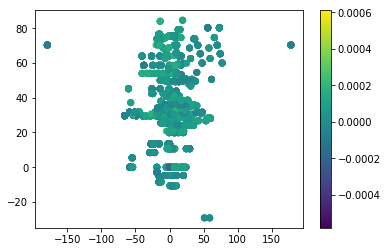

In [43]:
plt.scatter(ha[igfa2],dec[igfa2],c=reseta[igfa2])
plt.colorbar()

The next 3 cells are for the older, post CI run version of PM gfaproc. Note the much larger standard deviations of the residuals

In [365]:
#print(np.std(resxi[igfa2]*3600))
#print(np.std(resxi[igfa4]*3600))
#print(np.std(resxi[igfa6]*3600))
#print(np.std(resxi[igfa8]*3600))
#print(np.std(resxi[igfa99]*3600))

1.02319752239
0.481385746057
1.10763475815
1.12437699539
0.363625413892


Now plots for the latest PM version of gfaproc 

Text(0.5,1,'Xi residuals, PM sequences, by CI camera')

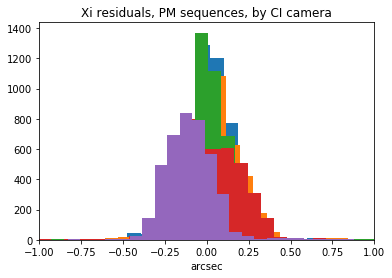

In [47]:
a,b,c = plt.hist(resxi[igfa2]*3600,bins=50)
a,b,c = plt.hist(resxi[igfa4]*3600,bins=50)
a,b,c = plt.hist(resxi[igfa6]*3600,bins=50)
a,b,c = plt.hist(resxi[igfa8]*3600,bins=50)
a,b,c = plt.hist(resxi[igfa99]*3600,bins=50)
plt.xlim(-1,1)
plt.xlabel('arcsec')
plt.title('Xi residuals, PM sequences, by CI camera')

In [48]:
print(np.mean(resxi[igfa2]*3600))
print(np.mean(resxi[igfa4]*3600))
print(np.mean(resxi[igfa6]*3600))
print(np.mean(resxi[igfa8]*3600))
print(np.mean(resxi[igfa99]*3600))

0.0146693227092
0.0217644859813
0.0266577946768
0.0293466192171
-0.101035153328


In [49]:
print(np.std(resxi[igfa2]*3600))
print(np.std(resxi[igfa4]*3600))
print(np.std(resxi[igfa6]*3600))
print(np.std(resxi[igfa8]*3600))
print(np.std(resxi[igfa99]*3600))

0.244987710512
0.192377502353
0.27006080291
0.212223953751
0.16142367578


Text(0.5,1,'CI camera 2/CIW Xi resid')

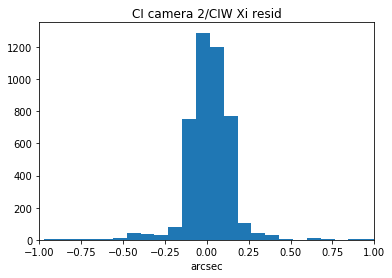

In [50]:
a,b,c = plt.hist(resxi[igfa2]*3600,bins=50)
plt.xlim(-1,1)
plt.xlabel('arcsec')
plt.title('CI camera 2/CIW Xi resid')

Text(0.5,1,'CI camera 4/CIN Xi resid')

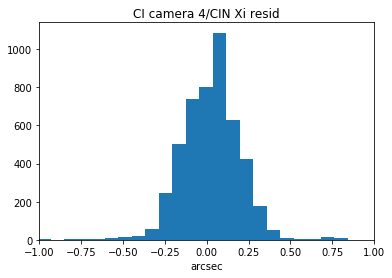

In [51]:
a,b,c = plt.hist(resxi[igfa4]*3600,bins=50)
plt.xlim(-1,1)
plt.xlabel('arcsec')
plt.title('CI camera 4/CIN Xi resid')

Text(0.5,1,'CI camera 6/CIE Xi resid')

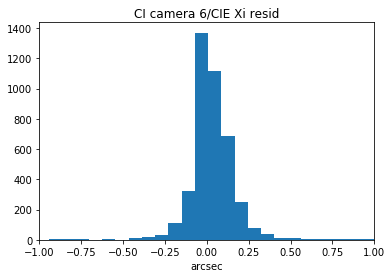

In [52]:
a,b,c = plt.hist(resxi[igfa6]*3600,bins=50)
plt.xlim(-1,1)
plt.xlabel('arcsec')
plt.title('CI camera 6/CIE Xi resid')

Text(0.5,1,'CI camera 8/CIS Xi resid')

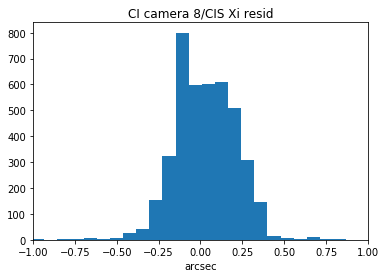

In [53]:
a,b,c = plt.hist(resxi[igfa8]*3600,bins=50)
plt.xlim(-1,1)
plt.xlabel('arcsec')
plt.title('CI camera 8/CIS Xi resid')

Text(0.5,1,'CI camera 99/CIC Xi resid')

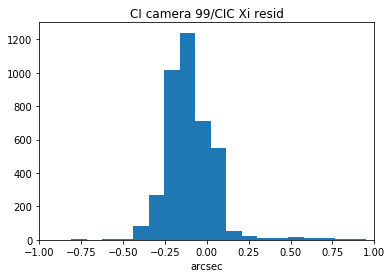

In [54]:
a,b,c = plt.hist(resxi[igfa99]*3600,bins=40)
plt.xlim(-1,1)
plt.xlabel('arcsec')
plt.title('CI camera 99/CIC Xi resid')

Text(0.5,1,'Eta residuals, PM sequences, by CI camera')

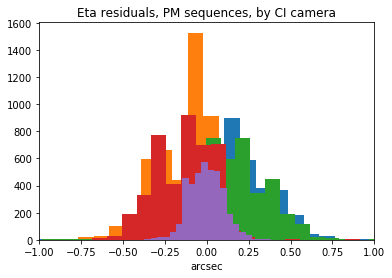

In [55]:
a,b,c = plt.hist(reseta[igfa2]*3600,bins=45)
a,b,c = plt.hist(reseta[igfa4]*3600,bins=45)
a,b,c = plt.hist(reseta[igfa6]*3600,bins=45)
a,b,c = plt.hist(reseta[igfa8]*3600,bins=45)
a,b,c = plt.hist(reseta[igfa99]*3600,bins=40)
plt.xlim(-1,1)
plt.xlabel('arcsec')
plt.title('Eta residuals, PM sequences, by CI camera')

In [56]:
print(np.mean(reseta[igfa2]*3600))
print(np.mean(reseta[igfa4]*3600))
print(np.mean(reseta[igfa6]*3600))
print(np.mean(reseta[igfa8]*3600))
print(np.mean(reseta[igfa99]*3600))

0.139282868526
-0.142265420561
0.146019011407
-0.137500355872
0.00455048616305


In [57]:
print(np.std(reseta[igfa2]*3600))
print(np.std(reseta[igfa4]*3600))
print(np.std(reseta[igfa6]*3600))
print(np.std(reseta[igfa8]*3600))
print(np.std(reseta[igfa99]*3600))

0.286785501672
0.196934821564
0.318055139688
0.223661700006
0.110782282734


Text(0.5,1,'CI camera 2/CIW Eta resid')

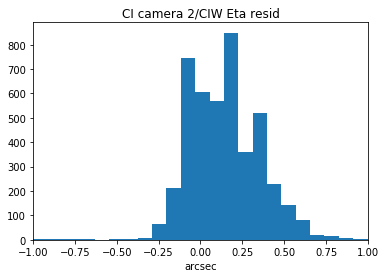

In [58]:
a,b,c = plt.hist(reseta[igfa2]*3600,bins=50)
plt.xlim(-1,1)
plt.xlabel('arcsec')
plt.title('CI camera 2/CIW Eta resid')

Text(0.5,1,'CI camera 4/CIN Eta resid')

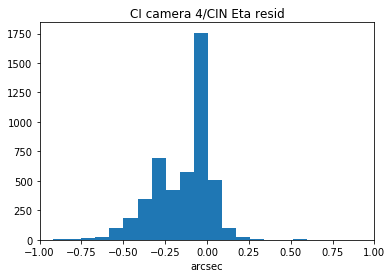

In [59]:
a,b,c = plt.hist(reseta[igfa4]*3600,bins=50)
plt.xlim(-1,1)
plt.xlabel('arcsec')
plt.title('CI camera 4/CIN Eta resid')

Text(0.5,1,'CI camera 6/CIE')

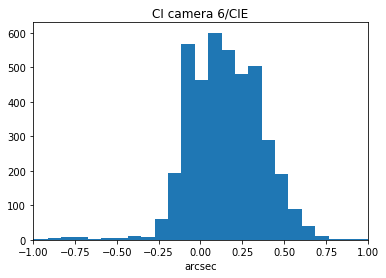

In [60]:
a,b,c = plt.hist(reseta[igfa6]*3600,bins=50)
plt.xlim(-1,1)
plt.xlabel('arcsec')
plt.title('CI camera 6/CIE')

Text(0.5,1,'CI camera 8/CIS')

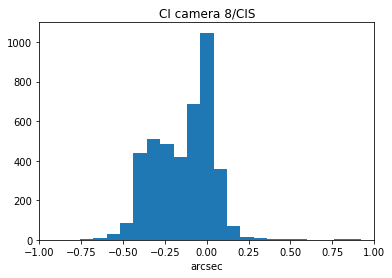

In [61]:
a,b,c = plt.hist(reseta[igfa8]*3600,bins=50)
plt.xlim(-1,1)
plt.xlabel('arcsec')
plt.title('CI camera 8/CIS')

Text(0.5,1,'CI camera 99/CIC')

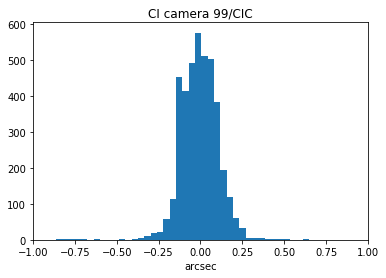

In [62]:
a,b,c = plt.hist(reseta[igfa99]*3600,bins=40)
plt.xlim(-1,1)
plt.xlabel('arcsec')
plt.title('CI camera 99/CIC')

In [63]:
print(np.std(reseta[igfa2]*3600))
print(np.std(reseta[igfa4]*3600))
print(np.std(reseta[igfa6]*3600))
print(np.std(reseta[igfa8]*3600))
print(np.std(reseta[igfa99]*3600))

0.286785501672
0.196934821564
0.318055139688
0.223661700006
0.110782282734


Text(0.5,1,'eta residuals, gfa 2')

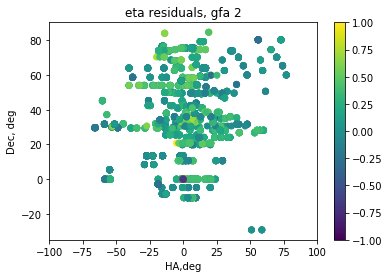

In [64]:
plt.scatter(ha[igfa2],dec[igfa2],c=reseta[igfa2]*3600,vmin=-1,vmax=1)
plt.colorbar()
plt.xlim(-100,100)
plt.xlabel('HA,deg')
plt.ylabel('Dec, deg')
plt.title('eta residuals, gfa 2')

Text(0.5,1,'xi residuals, gfa 2')

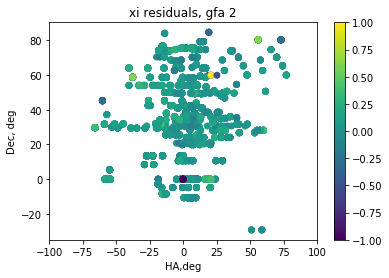

In [65]:
plt.scatter(ha[igfa2],dec[igfa2],c=resxi[igfa2]*3600,vmin=-1,vmax=1)
plt.colorbar()
plt.xlim(-100,100)
plt.xlabel('HA,deg')
plt.ylabel('Dec, deg')
plt.title('xi residuals, gfa 2')

Text(0.5,1,'eta residuals, gfa 4')

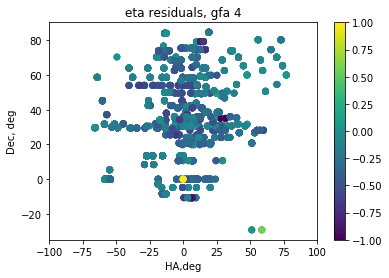

In [66]:
plt.scatter(ha[igfa4],dec[igfa4],c=reseta[igfa4]*3600,vmin=-1,vmax=1)
plt.colorbar()
plt.xlim(-100,100)
plt.xlabel('HA,deg')
plt.ylabel('Dec, deg')
plt.title('eta residuals, gfa 4')

Text(0.5,1,'xi residuals, gfa 4')

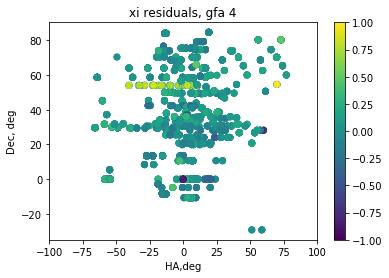

In [67]:
plt.scatter(ha[igfa4],dec[igfa4],c=resxi[igfa4]*3600,vmin=-1,vmax=1)
plt.colorbar()
plt.xlim(-100,100)
plt.xlabel('HA,deg')
plt.ylabel('Dec, deg')
plt.title('xi residuals, gfa 4')

Text(0.5,1,'eta residuals, gfa 4')

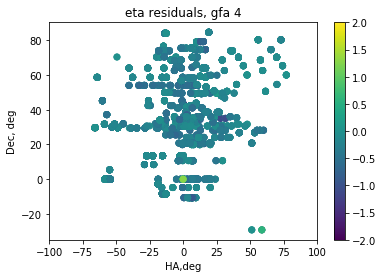

In [68]:
plt.scatter(ha[igfa4],dec[igfa4],c=reseta[igfa4]*3600,vmin=-2,vmax=2)
plt.colorbar()
plt.xlim(-100,100)
plt.xlabel('HA,deg')
plt.ylabel('Dec, deg')
plt.title('eta residuals, gfa 4')

Text(0.5,1,'eta residuals, gfa 6')

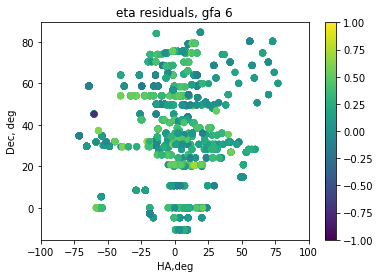

In [69]:
plt.scatter(ha[igfa6],dec[igfa6],c=reseta[igfa6]*3600,vmin=-1,vmax=1)
plt.colorbar()
plt.xlim(-100,100)
plt.xlabel('HA,deg')
plt.ylabel('Dec, deg')
plt.title('eta residuals, gfa 6')

Text(0.5,1,'xi residuals, gfa 6')

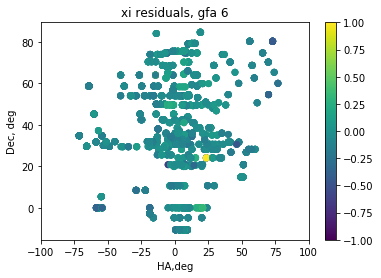

In [70]:
plt.scatter(ha[igfa6],dec[igfa6],c=resxi[igfa6]*3600,vmin=-1,vmax=1)
plt.colorbar()
plt.xlim(-100,100)
plt.xlabel('HA,deg')
plt.ylabel('Dec, deg')
plt.title('xi residuals, gfa 6')

Text(0.5,1,'eta residuals, gfa 8')

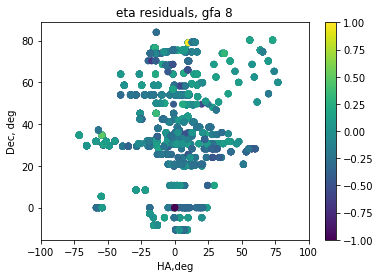

In [71]:
plt.scatter(ha[igfa8],dec[igfa8],c=reseta[igfa8]*3600,vmin=-1,vmax=1)
plt.colorbar()
plt.xlim(-100,100)
plt.xlabel('HA,deg')
plt.ylabel('Dec, deg')
plt.title('eta residuals, gfa 8')

Text(0.5,1,'xi residuals, gfa 8')

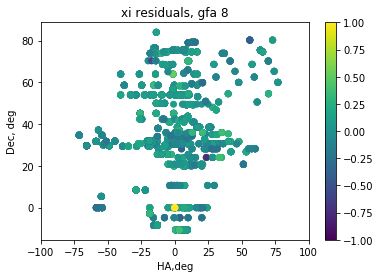

In [72]:
plt.scatter(ha[igfa8],dec[igfa8],c=resxi[igfa8]*3600,vmin=-1,vmax=1)
plt.colorbar()
plt.xlim(-100,100)
plt.xlabel('HA,deg')
plt.ylabel('Dec, deg')
plt.title('xi residuals, gfa 8')

Text(0.5,1,'eta residuals, gfa 99')

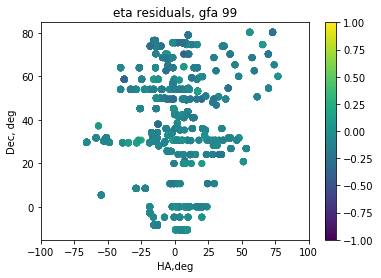

In [73]:
plt.scatter(ha[igfa99],dec[igfa99],c=reseta[igfa99]*3600,vmin=-1,vmax=1)
plt.colorbar()
plt.xlim(-100,100)
plt.xlabel('HA,deg')
plt.ylabel('Dec, deg')
plt.title('eta residuals, gfa 99')

Text(0.5,1,'xi residuals, gfa 99')

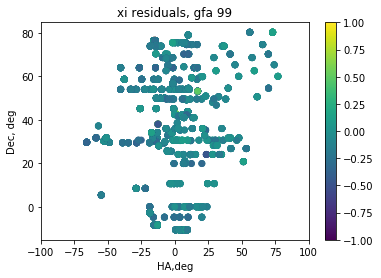

In [74]:
plt.scatter(ha[igfa99],dec[igfa99],c=resxi[igfa99]*3600,vmin=-1,vmax=1)
plt.colorbar()
plt.xlim(-100,100)
plt.xlabel('HA,deg')
plt.ylabel('Dec, deg')
plt.title('xi residuals, gfa 99')

Check whether the gloal solution info in the gfamatch file is consistent with the info in the gfaproc file.<br>
Pick sequd 10215 again.

In [75]:
len(successlist)

402

In [76]:
len(reseta)

21767

In [77]:
i10215,=np.where(seqid == 10215)
i10215gfa2,=np.where((seqid == 10215) & (gfaid == 2))
i10215gfa4,=np.where((seqid == 10215) & (gfaid == 4))
i10215gfa6,=np.where((seqid == 10215) & (gfaid == 6))
i10215gfa8,=np.where((seqid == 10215) & (gfaid == 8))
i10215gfa99,=np.where((seqid == 10215) & (gfaid == 99))

In [78]:
len(i10215gfa2)

15

In [79]:
print(np.std(resxi[i10215gfa2])*3600.)
print(np.std(resxi[i10215gfa4])*3600.)
print(np.std(resxi[i10215gfa6])*3600.)
print(np.std(resxi[i10215gfa8])*3600.)
print(np.std(resxi[i10215gfa99])*3600.)
print(np.std(resxi[i10215])*3600.)

0.0512499756098
0.0536108426438
0.0608748716631
0.0985900603509
0.0978495304651
0.106770943954


In [81]:
print(np.std(reseta[i10215gfa2])*3600.)
print(np.std(reseta[i10215gfa4])*3600.)
print(np.std(reseta[i10215gfa6])*3600.)
print(np.std(reseta[i10215gfa8])*3600.)
print(np.std(reseta[i10215gfa99])*3600.)
print(np.std(reseta[i10215])*3600.)

0.0991290068547
0.0515997152341
0.132195877394
0.0647437255647
0.053938740763
0.30044512797


Compare residuals to the global solution rmsx,rmsy = 0.11,0.3 arcsec in gfaproc-10215.6.out <br>
Nice.

In [82]:
# read output of one gfaproc.out file and the nfsproc output file to go with it
def readgfaproc(seqlist=None):
    if seqlist is None:
        seqlist = os.listdir(os.environ['PMDIR'])
    nseq = len(seqlist)
    os.chdir(os.environ['PMDIR'])
    scalelist = []
    # field rotation degrees
    rotlist = []
    # rms x,y in arcsec
    rmsxlist = []
    rmsylist = []
    halist = []
    declist = []
    zdlist = []
    paranglelist = []
    maxlist = []
    # pointing corrections in ra,dec in arcsec
    raofflist = []
    decofflist = []
    for i in range(nseq):
        iseq = seqlist[i]
        if re.search('(^([0-9]+)$)',iseq) == None:
            continue
        os.chdir(iseq)
        # read output of nfsproc
        nfsname = 'nfs-' + iseq + '.2.par'
        nfsdict = {}
        with open(nfsname) as nfsf:
            for nline in nfsf:
                llist = nline.split()
                if re.search('#',llist[0]) != None:
                    continue
                ikey = llist[0]
                if ikey in ['raBore','decBore','zd','psi','ha','exptime','mjd','yr','mon','day','spectime']:
                    nfsdict[ikey] = np.double(llist[1])
        # get all gfaproc.out files
        alllist = os.listdir()
        gfaoutlist = []
        gfaimagefile = ''
        for i in range(len(alllist)):
            if re.search('gfaproc',alllist[i]) !=None:
                gfaoutlist.append(alllist[i])
            if re.search('(^gfa-)([0-9]+)(\.)([0-9])(\.)(fits$)',alllist[i]) != None:
                gfaimagefile = alllist[i]
        # now find the most recent gfaproc.out file
        configlist = []
        for i in range(len(gfaoutlist)):
            splitlist = gfaoutlist[i].split(sep='.')
            configlist.append(int(splitlist[1]))
        configarr = np.asarray(configlist)
        idxmax = np.argmax(configarr)
        # we will need the actual PM seq number later
        maxnum = configarr[idxmax]
        maxlist.append(maxnum)
        # get most recent gfaproc.out file name
        gfaprocfile = gfaoutlist[idxmax]
        with open(gfaprocfile) as matchf:
            for matchl in matchf:
                llist = matchl.split()
                if len(llist) < 1:
                    continue
                if (re.match('scale',llist[0]) != None):
                    if ((re.match('correction',llist[1])!= None) & (len(llist) > 6)):
                        scale = float(llist[2])
                        # add rotation zero point from comm.par file 
                        #rotation = float(llist[5]) + float(llist[9])
                        # no, don't do that
                        rotation = float(llist[5])
                if ((re.match('rmsx',llist[0]) != None) & (len(llist) > 4)):
                    if (re.match('arcsec',llist[4])!= None):
                        rmsx = float(llist[1])
                        rmsy = float(llist[3])
                if (re.match('Pointing',llist[0]) != None):
                    raoffall = llist[5]
                    raoff = float(re.search('([-0-9.]+)(\,$)',raoffall).group(1))
                    decoff = float(llist[8])
        scalelist.append(scale)
        rotlist.append(rotation)
        rmsxlist.append(rmsx)
        rmsylist.append(rmsy)
        halist.append(nfsdict['ha'])
        declist.append(nfsdict['decBore'])
        zdlist.append(nfsdict['zd'])
        paranglelist.append(nfsdict['psi'])
        raofflist.append(raoff)
        decofflist.append(decoff)
        os.chdir('..')
    os.chdir('..')
    scalelist = np.asarray(scalelist)
    rotlist = np.asarray(rotlist)
    rmsxlist = np.asarray(rmsxlist)
    rmsylist = np.asarray(rmsylist)
    halist = np.asarray(halist)
    declist = np.asarray(declist)
    zdlist = np.asarray(zdlist)
    paranglelist = np.asarray(paranglelist)
    raofflist = np.asarray(raofflist)
    decofflist = np.asarray(decofflist)
    return scalelist,rotlist,rmsxlist,rmsylist,halist,declist,zdlist,paranglelist,raofflist,decofflist,maxnum


In [85]:
os.chdir('..')

In [86]:
os.getcwd()

'/global/u2/c/crockosi/platemaker'

Test with one sequence

In [87]:
scalelist,rotlist,rmsxlist,rmsylist,halist,declist,zdlist,paranglelist,raoff,decoff,maxnumlist = readgfaproc(['10215'])

In [88]:
scalelist,rotlist,rmsxlist,rmsylist,halist,declist,zdlist,paranglelist,raofflist,decofflist,maxnumlist = readgfaproc(successlist)

Text(0.5,1,'PlateMaker GFA proc global RMS x')

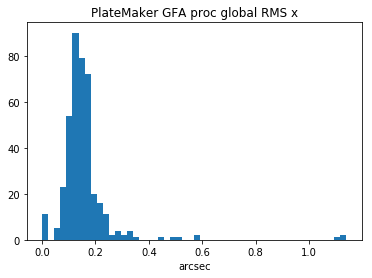

In [89]:
a,b,c = plt.hist(rmsxlist,bins=50)
plt.xlabel('arcsec')
plt.title('PlateMaker GFA proc global RMS x')

In [90]:
np.mean(rmsxlist)

0.15572139303482591

Text(0.5,1,'PlateMaker GFA proc global RMS y')

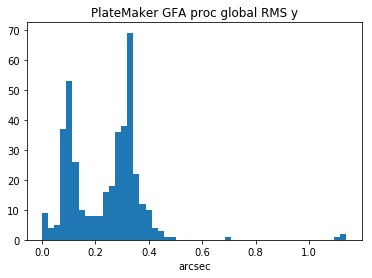

In [91]:
a,b,c = plt.hist(rmsylist,bins=50)
plt.xlabel('arcsec')
plt.title('PlateMaker GFA proc global RMS y')

Text(0.5,1,'field rotation, PlateMaker gfaproc')

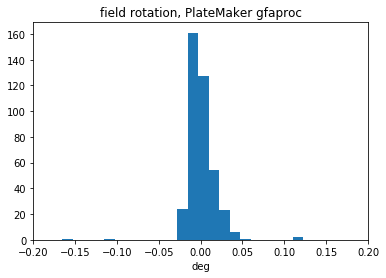

In [92]:
a,b,c = plt.hist(rotlist,bins=100)
plt.xlim(-0.2,0.2)
plt.xlabel('deg')
plt.title('field rotation, PlateMaker gfaproc')

Text(0.5,1,'field rotation, PlateMaker gfaproc')

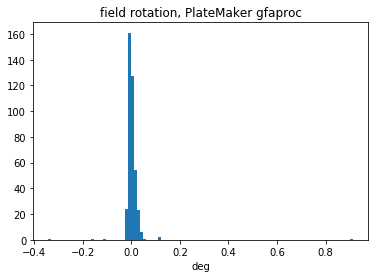

In [93]:
a,b,c = plt.hist(rotlist,bins=100)
plt.xlabel('deg')
plt.title('field rotation, PlateMaker gfaproc')

Text(0.5,1,'PlateMaker gfaproc astrometry')

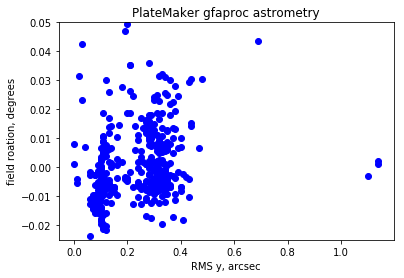

In [94]:
plt.plot(rmsylist,rotlist,'bo')
plt.ylim(-0.15,0.05)
plt.ylim(-0.025,0.05)
plt.xlabel('RMS y, arcsec')
plt.ylabel('field roation, degrees')
plt.title('PlateMaker gfaproc astrometry')

In [95]:
goodseqidlist = [int(i) for i in successlist]

In [96]:
goodseqid = np.asarray(goodseqidlist)

Text(0.5,1,'PlateMaker gfaproc astrometry, cage move after seqid 11954')

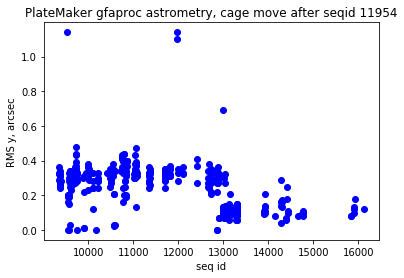

In [97]:
plt.plot(goodseqidlist,rmsylist,'bo')
plt.ylabel('RMS y, arcsec')
plt.xlabel('seq id')
plt.title('PlateMaker gfaproc astrometry, cage move after seqid 11954')

Text(0.5,1,'PlateMaker gfaproc astrometry, cage move after seqid 11954')

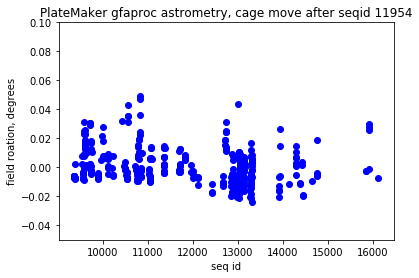

In [98]:
plt.plot(goodseqidlist,rotlist,'bo')
plt.ylim(-0.05,0.1)
plt.ylabel('field roation, degrees')
plt.xlabel('seq id')
plt.title('PlateMaker gfaproc astrometry, cage move after seqid 11954')

Text(0.5,1,'PlateMaker GFA proc field rotation, deg')

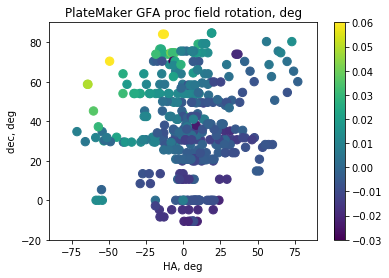

In [99]:
plt.scatter(halist,declist,c=rotlist,vmin=-0.03,vmax=0.06,s=70)
plt.colorbar()
plt.xlim(-90,90)
plt.ylim(-20,90)
plt.xlabel('HA, deg')
plt.ylabel('dec, deg')
plt.title('PlateMaker GFA proc field rotation, deg')

Text(0.5,1,'PlateMaker GFA proc RMS y astrometric residual, arcsec')

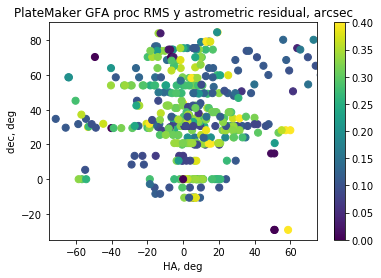

In [100]:
plt.scatter(halist,declist,c=rmsylist,vmin=0,vmax=0.4,s=50)
plt.colorbar()
plt.xlim(-75,75)
plt.xlabel('HA, deg')
plt.ylabel('dec, deg')
plt.title('PlateMaker GFA proc RMS y astrometric residual, arcsec')

Text(0.5,1,'PlateMaker GFA proc RMS x astrometric residual, arcsec')

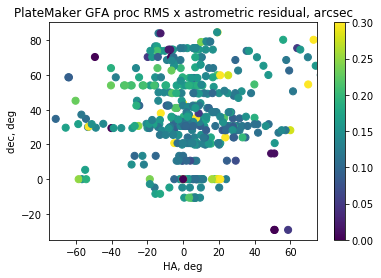

In [101]:
plt.scatter(halist,declist,c=rmsxlist,vmin=0,vmax=0.3,s=50)
plt.colorbar()
plt.xlim(-75,75)
plt.xlabel('HA, deg')
plt.ylabel('dec, deg')
plt.title('PlateMaker GFA proc RMS x astrometric residual, arcsec')

Pick out some well-measured sequences

In [102]:
igood,=np.where((rmsxlist < 0.2) & (rmsylist < 0.2))

In [103]:
len(igood)

147

Text(0.5,1,'PlateMaker GFA proc field rotation, deg')

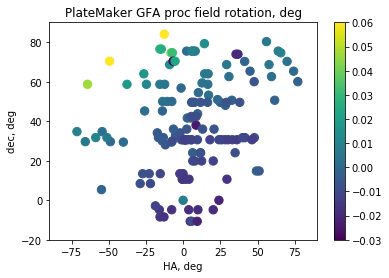

In [104]:
plt.scatter(halist[igood],declist[igood],c=rotlist[igood],vmin=-0.03,vmax=0.06,s=70)
plt.colorbar()
plt.xlim(-90,90)
plt.ylim(-20,90)
plt.xlabel('HA, deg')
plt.ylabel('dec, deg')
plt.title('PlateMaker GFA proc field rotation, deg')

Interesting, the large residy are not correlated with dec, ha or rotation

Find fields with no rotation.  We should be able to see that the guider gets those dead on to the pixel postions predicted by PM

In [105]:
inorot,=np.where((rmsxlist < 0.2) & (rmsylist < 0.2) & (rotlist > -0.0003) & (rotlist < 0.0003))

In [106]:
len(inorot)

3

In [107]:
inorot

array([172, 278, 359])

In [111]:
print(successlist[172])
print(successlist[278])
print(successlist[359])

13138
13046
13146


In [112]:
print(raofflist[172])
print(decofflist[172])

4.17
3.63


In [113]:
print(raofflist[278])
print(decofflist[278])

-5.68
-0.25


In [114]:
print(raofflist[359])
print(decofflist[359])

3.92
4.19
